# Bloor Danforth Trip Analysis - Rami

### Notes
Building on arrival_time_exploration notebook by Bohan

In [168]:
# import necessary packages
import numpy as np  
import pandas as pd
from datetime import date;
import matplotlib.pyplot as plt

# specify location of sample data
sample_data_dir = "../../sample_data"

# load sample data
responses = pd.read_csv(sample_data_dir+"/responses.csv") # import file
requests = pd.read_csv(sample_data_dir+"/requests.csv") # import file


In [169]:
# merge two dataframes
df = pd.merge(left=responses, right=requests, left_on='requestid',
                  right_on='requestid')
## Line 2 (BD) trains
trains_BD = df[(df['subwayline'] == 'BD') & (df['lineid'] == 2)]


In [170]:
# at station
trains_BD_AtStation = trains_BD[trains_BD['train_message'] == 'AtStation']

# delayed
trains_BD_Delayed = trains_BD[(trains_BD['train_message'] == 'Delayed') &
                              (trains_BD['timint'] <2) &
                              (trains_BD['timint'] >0)]
# arriving
trains_BD_Arriving = trains_BD[(trains_BD['train_message'] == 'Arriving') &
                              (trains_BD['timint'] <2) &
                              (trains_BD['timint'] >0)]
# concat all 
bd_trains = pd.concat([trains_BD_AtStation, trains_BD_Delayed, trains_BD_Arriving])

In [171]:
# separate date and time
r_date = pd.to_datetime(bd_trains['request_date'])
bd_trains['date'] = r_date.dt.date
bd_trains['time'] = r_date.dt.time
bd_trains.drop(columns=['request_date'])

# sort
bd_trains.sort_values(by=['date','trainid','time','stationid'], inplace=True)

In [183]:
train = 201
day = date(2019,7,7);
train_day_data = bd_trains.loc[(bd_trains['trainid'] == train) & (bd_trains['date'] == day),:] 

#bd_trains.loc[,'station_char']
train_day_data.insert(len(train_day_data.columns), "Good", np.ones([len(train_day_data.index),1],dtype=bool))
train_day_data

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,data_,stationid,lineid,all_stations,create_date,pollid,request_date,date,time,Good
407424,79838,31832084264,WAR2,BD,Normal,0.558831,West,201,Arriving,Westbound<br/> To Kipling,NaN,62,2,success,2019-07-07 08:01:50,1140,2019-07-07 08:01:54.280833-04:00,2019-07-07,08:01:54.280833,True
406973,79654,31832098887,VPK2,BD,Normal,1.294881,West,201,Arriving,Westbound<br/> To Kipling,NaN,61,2,success,2019-07-07 08:04:46,1137,2019-07-07 08:04:47.539051-04:00,2019-07-07,08:04:47.539051,True
406791,79590,31832106079,VPK2,BD,Normal,0.000000,West,201,AtStation,Westbound<br/> To Kipling,NaN,61,2,success,2019-07-07 08:05:53,1136,2019-07-07 08:05:55.926069-04:00,2019-07-07,08:05:55.926069,True
406600,79524,31832112382,MST2,BD,Normal,0.582612,West,201,Arriving,Westbound<br/> To Kipling,NaN,60,2,success,2019-07-07 08:06:51,1135,2019-07-07 08:06:56.888761-04:00,2019-07-07,08:06:56.888761,True
406403,79458,31832119552,WDB2,BD,Normal,1.733893,West,201,Arriving,Westbound<br/> To Kipling,NaN,59,2,success,2019-07-07 08:07:35,1134,2019-07-07 08:07:37.128692-04:00,2019-07-07,08:07:37.128692,True
406405,79459,31832119551,MST2,BD,Normal,0.000000,West,201,AtStation,Westbound<br/> To Kipling,NaN,60,2,success,2019-07-07 08:07:35,1134,2019-07-07 08:07:37.253504-04:00,2019-07-07,08:07:37.253504,True
406175,79389,31832128242,COX2,BD,Normal,1.612445,West,201,Arriving,Westbound<br/> To Kipling,NaN,58,2,success,2019-07-07 08:08:36,1133,2019-07-07 08:08:36.914934-04:00,2019-07-07,08:08:36.914934,True
406177,79390,31832128241,WDB2,BD,Normal,0.305177,West,201,Arriving,Westbound<br/> To Kipling,NaN,59,2,success,2019-07-07 08:08:36,1133,2019-07-07 08:08:37.034268-04:00,2019-07-07,08:08:37.034268,True
405944,79320,31832137081,GWD2,BD,Normal,1.401539,West,201,Arriving,Westbound<br/> To Kipling,NaN,57,2,success,2019-07-07 08:09:41,1132,2019-07-07 08:09:44.197324-04:00,2019-07-07,08:09:44.197324,True
405946,79321,31832137079,COX2,BD,Normal,0.458615,West,201,Arriving,Westbound<br/> To Kipling,NaN,58,2,success,2019-07-07 08:09:41,1132,2019-07-07 08:09:44.328011-04:00,2019-07-07,08:09:44.328011,True


In [184]:
# filter non-sensical case that the train is at more than one at station at once
def filter_repeats(df):
    if (len(df['train_message']) > 1):
        if not(df[df['train_message'].isin(['AtStation'])].empty):
            df['Good'] = (df['train_message'] =='AtStation')
        else:
            df['Good'] = (df['timint'] <= df['timint'].min())
    return df


train_day_data = train_day_data.groupby('pollid').apply(filter_repeats)
train_day_data

,requestid,id,station_char,subwayline,system_message_type,timint,traindirection,trainid,train_message,train_dest,data_,stationid,lineid,all_stations,create_date,pollid,request_date,date,time,Good
407424,79838,31832084264,WAR2,BD,Normal,0.558831,West,201,Arriving,Westbound<br/> To Kipling,NaN,62,2,success,2019-07-07 08:01:50,1140,2019-07-07 08:01:54.280833-04:00,2019-07-07,08:01:54.280833,True
406973,79654,31832098887,VPK2,BD,Normal,1.294881,West,201,Arriving,Westbound<br/> To Kipling,NaN,61,2,success,2019-07-07 08:04:46,1137,2019-07-07 08:04:47.539051-04:00,2019-07-07,08:04:47.539051,True
406791,79590,31832106079,VPK2,BD,Normal,0.000000,West,201,AtStation,Westbound<br/> To Kipling,NaN,61,2,success,2019-07-07 08:05:53,1136,2019-07-07 08:05:55.926069-04:00,2019-07-07,08:05:55.926069,True
406600,79524,31832112382,MST2,BD,Normal,0.582612,West,201,Arriving,Westbound<br/> To Kipling,NaN,60,2,success,2019-07-07 08:06:51,1135,2019-07-07 08:06:56.888761-04:00,2019-07-07,08:06:56.888761,True
406403,79458,31832119552,WDB2,BD,Normal,1.733893,West,201,Arriving,Westbound<br/> To Kipling,NaN,59,2,success,2019-07-07 08:07:35,1134,2019-07-07 08:07:37.128692-04:00,2019-07-07,08:07:37.128692,False
406405,79459,31832119551,MST2,BD,Normal,0.000000,West,201,AtStation,Westbound<br/> To Kipling,NaN,60,2,success,2019-07-07 08:07:35,1134,2019-07-07 08:07:37.253504-04:00,2019-07-07,08:07:37.253504,True
406175,79389,31832128242,COX2,BD,Normal,1.612445,West,201,Arriving,Westbound<br/> To Kipling,NaN,58,2,success,2019-07-07 08:08:36,1133,2019-07-07 08:08:36.914934-04:00,2019-07-07,08:08:36.914934,False
406177,79390,31832128241,WDB2,BD,Normal,0.305177,West,201,Arriving,Westbound<br/> To Kipling,NaN,59,2,success,2019-07-07 08:08:36,1133,2019-07-07 08:08:37.034268-04:00,2019-07-07,08:08:37.034268,True
405944,79320,31832137081,GWD2,BD,Normal,1.401539,West,201,Arriving,Westbound<br/> To Kipling,NaN,57,2,success,2019-07-07 08:09:41,1132,2019-07-07 08:09:44.197324-04:00,2019-07-07,08:09:44.197324,False
405946,79321,31832137079,COX2,BD,Normal,0.458615,West,201,Arriving,Westbound<br/> To Kipling,NaN,58,2,success,2019-07-07 08:09:41,1132,2019-07-07 08:09:44.328011-04:00,2019-07-07,08:09:44.328011,True


In [185]:
# Filter simultaneous station data
indexNames = train_day_data[train_day_data['Good'] == False ].index
filt_train_day_data = train_day_data.drop(indexNames)

# Filter bad labels (not sure why these exist). BRD1 and STG1 should be east bound only but are showing up on
# westbound for some reason
filt_train_day_data.loc[filt_train_day_data['station_char'] == 'BRD1','station_char'] = 'BRD2'
filt_train_day_data.loc[filt_train_day_data['station_char'] == 'SGL1','station_char'] = 'SGL2'

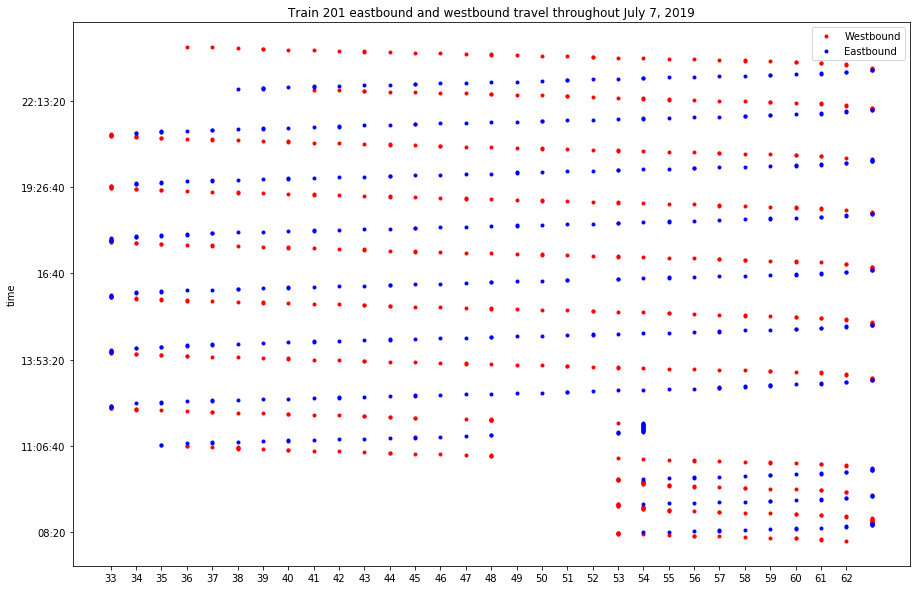

In [189]:
filt_train_day_data.sort_values(by=['stationid'], inplace=True)
plt.figure(figsize=(15, 10))

# Plot westbound departures in blue
x_series_west = filt_train_day_data.loc[filt_train_day_data['traindirection']=='West','stationid']
y_series_west = filt_train_day_data.loc[filt_train_day_data['traindirection']=='West','time']
plt.plot(x_series_west,y_series_west,'.',color='r')

# Plot eastbound departures in green
x_series_west = filt_train_day_data.loc[filt_train_day_data['traindirection']=='East','stationid']
y_series_west = filt_train_day_data.loc[filt_train_day_data['traindirection']=='East','time']
plt.plot(x_series_west,y_series_west,'.',color='b')

plt.xticks(np.arange(min([min(x_series_east),min(x_series_west)]), max([max(x_series_east),max(x_series_west)]), 1)) 
plt.title('Train 201 eastbound and westbound travel throughout July 7, 2019')
plt.legend(['Westbound', 'Eastbound'])
plt.show()